In [ ]:
# imports
import pandas as pd
import numpy as np
import statsmodels.graphics.mosaicplot as mplt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# load dataset
csv_file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(csv_file_path)

# Exploratory Data Analysis

In [ ]:
# Display the first few rows of the dataset
diabetes_data.head().T

,0,1,2,3,4
Age,40,58,41,45,60
Gender,Male,Male,Male,Male,Male
Polyuria,No,No,Yes,No,Yes
Polydipsia,Yes,No,No,No,Yes
sudden weight loss,No,No,No,Yes,Yes
weakness,Yes,Yes,Yes,Yes,Yes
Polyphagia,No,No,Yes,Yes,Yes
Genital thrush,No,No,No,Yes,No
visual blurring,No,Yes,No,No,Yes
Itching,Yes,No,Yes,Yes,Yes


In [ ]:
# Display column names
diabetes_data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
# Check for missing values
print("Missing Values:")
diabetes_data.isnull().sum()

Missing Values:


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

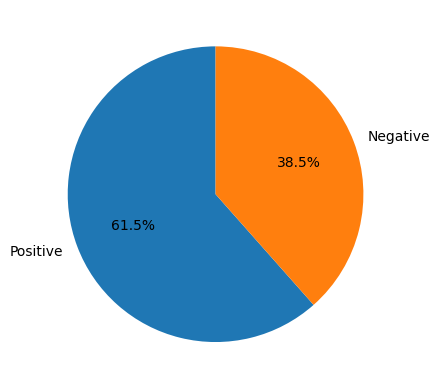

In [ ]:
diabetes_data['class'].value_counts()
plt.pie(diabetes_data['class'].value_counts(), labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle = 90)
plt.show()

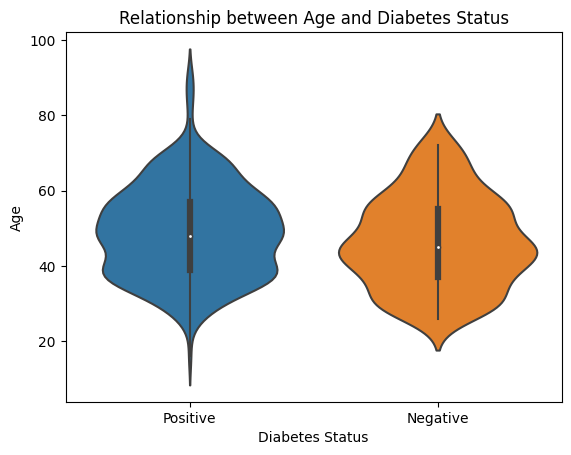

In [ ]:
sns.violinplot(x='class', y='Age', data=diabetes_data)
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.title('Relationship between Age and Diabetes Status')
plt.show()

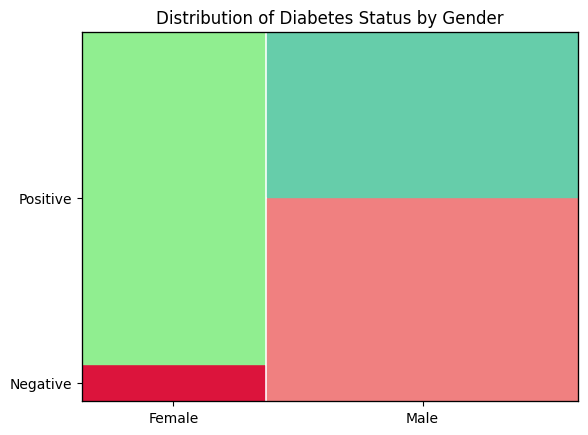

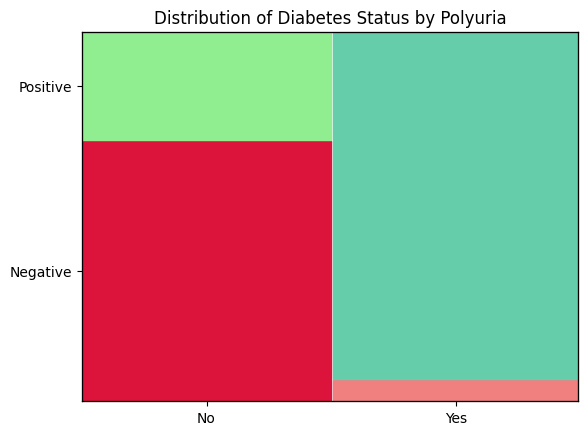

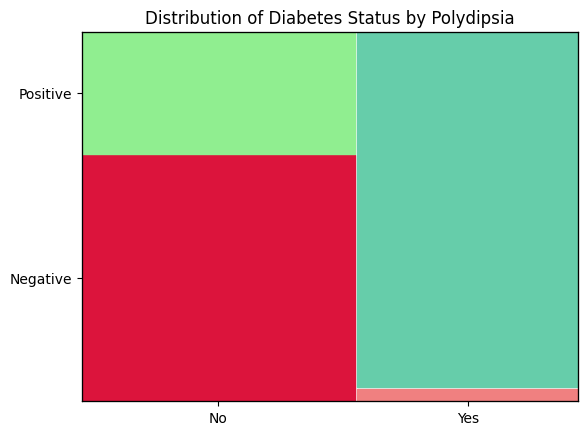

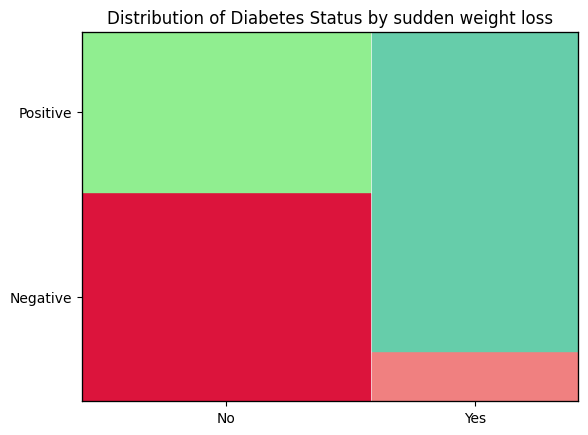

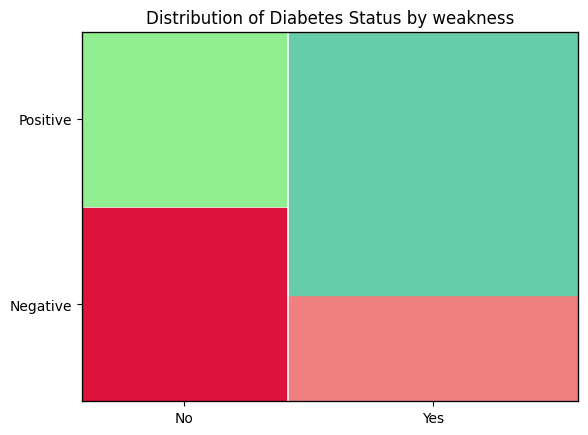

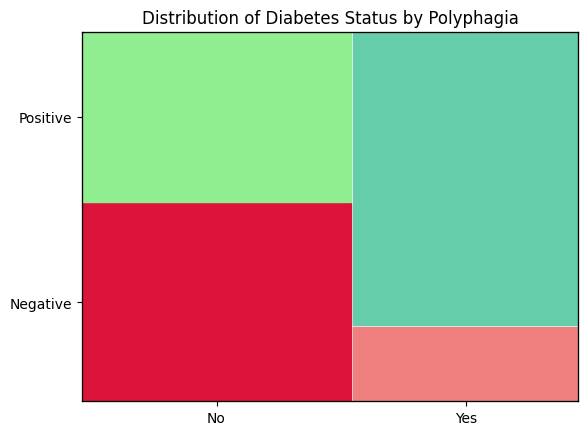

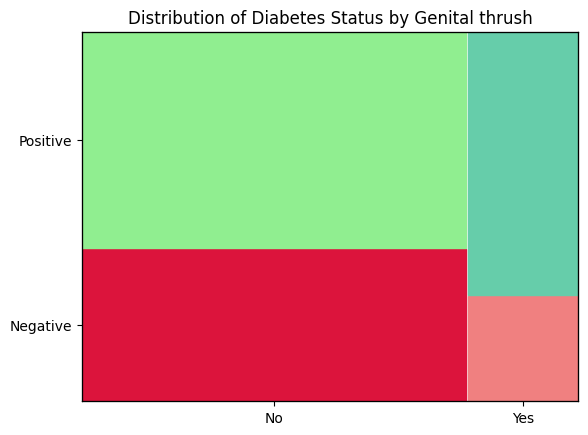

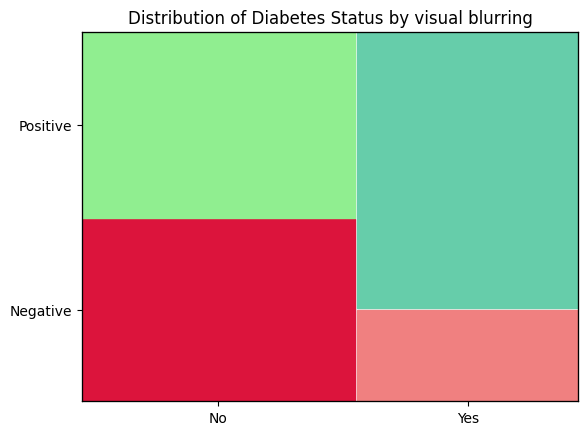

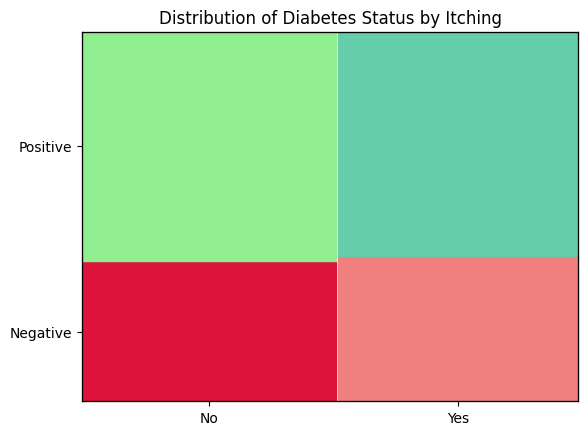

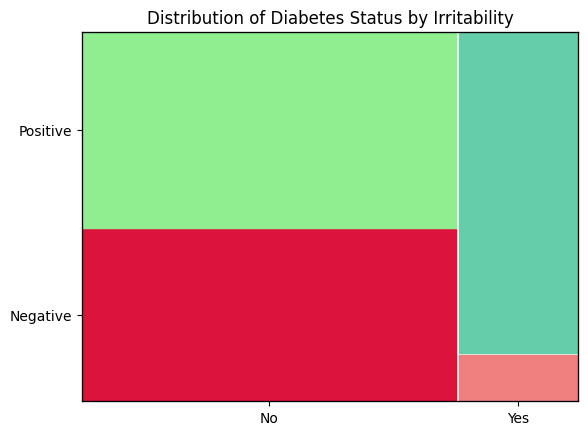

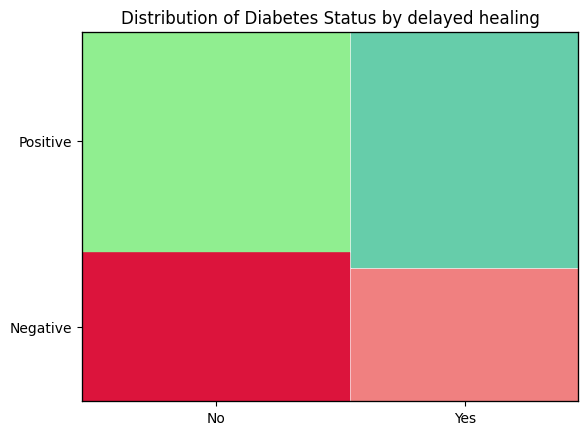

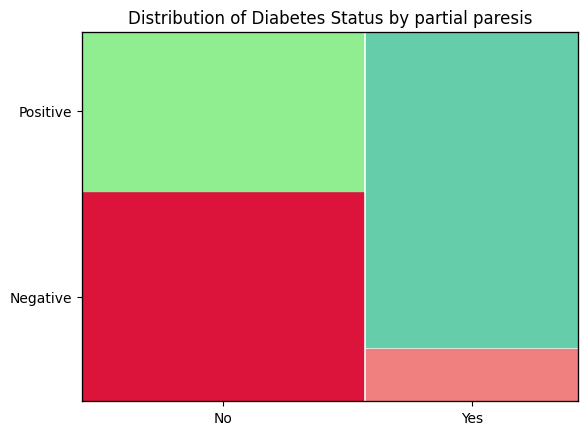

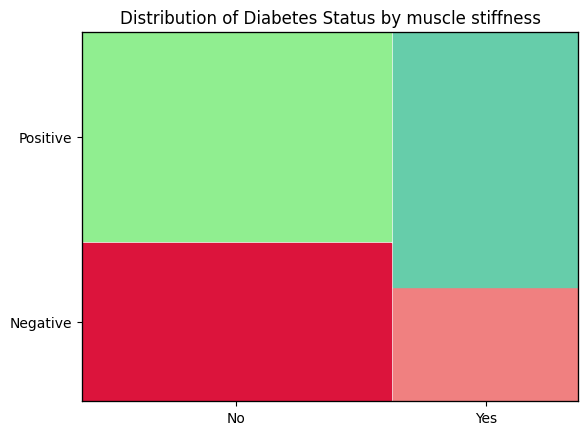

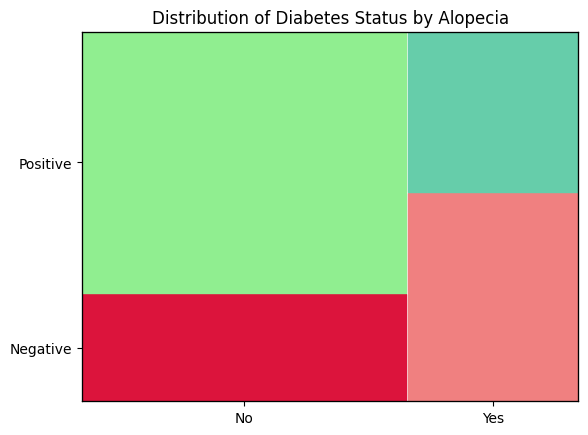

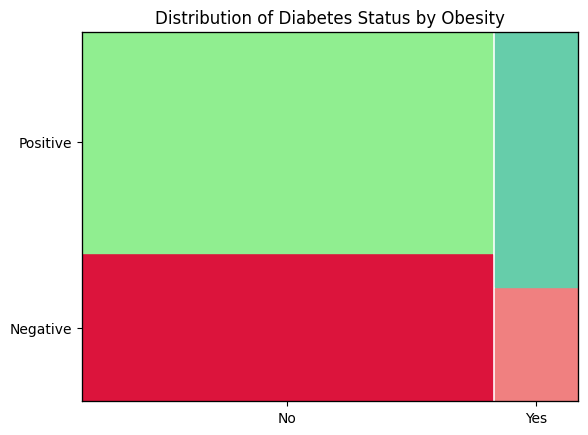

In [ ]:
features=diabetes_data.columns[1:-1]
for feature in features:
  vals=sorted(diabetes_data[feature].unique())
  props={}
  props[(vals[0], 'Negative')] = {'color' : 'crimson'}
  props[(vals[0], 'Positive')] = {'color' : 'lightgreen'}
  props[(vals[1], 'Negative')] = {'color' : 'lightcoral'}
  props[(vals[1], 'Positive')] = {'color' : 'mediumaquamarine'}
  mosaic_data = pd.crosstab(diabetes_data[feature], diabetes_data['class'])
  mplt.mosaic(mosaic_data.stack(), title='Distribution of Diabetes Status by {}'.format(feature), labelizer=lambda k: '', properties = props)
  plt.show()


In [ ]:
# Check data types
print("Data Types:")
print(diabetes_data.dtypes)


Data Types:
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


In [ ]:
# Convert categorical variables to numerical values (0 and 1)
label_encoder = LabelEncoder()
for feature in diabetes_data.columns[1:]:
  diabetes_data[feature] = label_encoder.fit_transform(diabetes_data[feature])


In [ ]:
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
# Check updated data types
print("Updated Data Types:")
print(diabetes_data.dtypes)


Updated Data Types:
Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


In [ ]:
# Check class distribution
print("Class Distribution:")
print(diabetes_data['class'].value_counts())

# processing done #

Class Distribution:
1    320
0    200
Name: class, dtype: int64


# Feature Selection

## Finding best features based on Correlation Matrix

In [ ]:
# Correlation matrix
correlation_matrix = diabetes_data.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['class'].sort_values(ascending=False)
selected_features_corr = correlation_with_target[abs(correlation_with_target) > 0.1].index

# Display selected features based on correlation
print("Selected Features based on Correlation:")
print(selected_features_corr)


Selected Features based on Correlation:
Index(['class', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'partial paresis', 'Polyphagia', 'Irritability', 'visual blurring',
       'weakness', 'muscle stiffness', 'Genital thrush', 'Age', 'Alopecia',
       'Gender'],
      dtype='object')


## Visualizing the Correlation Matrix

<Axes: >

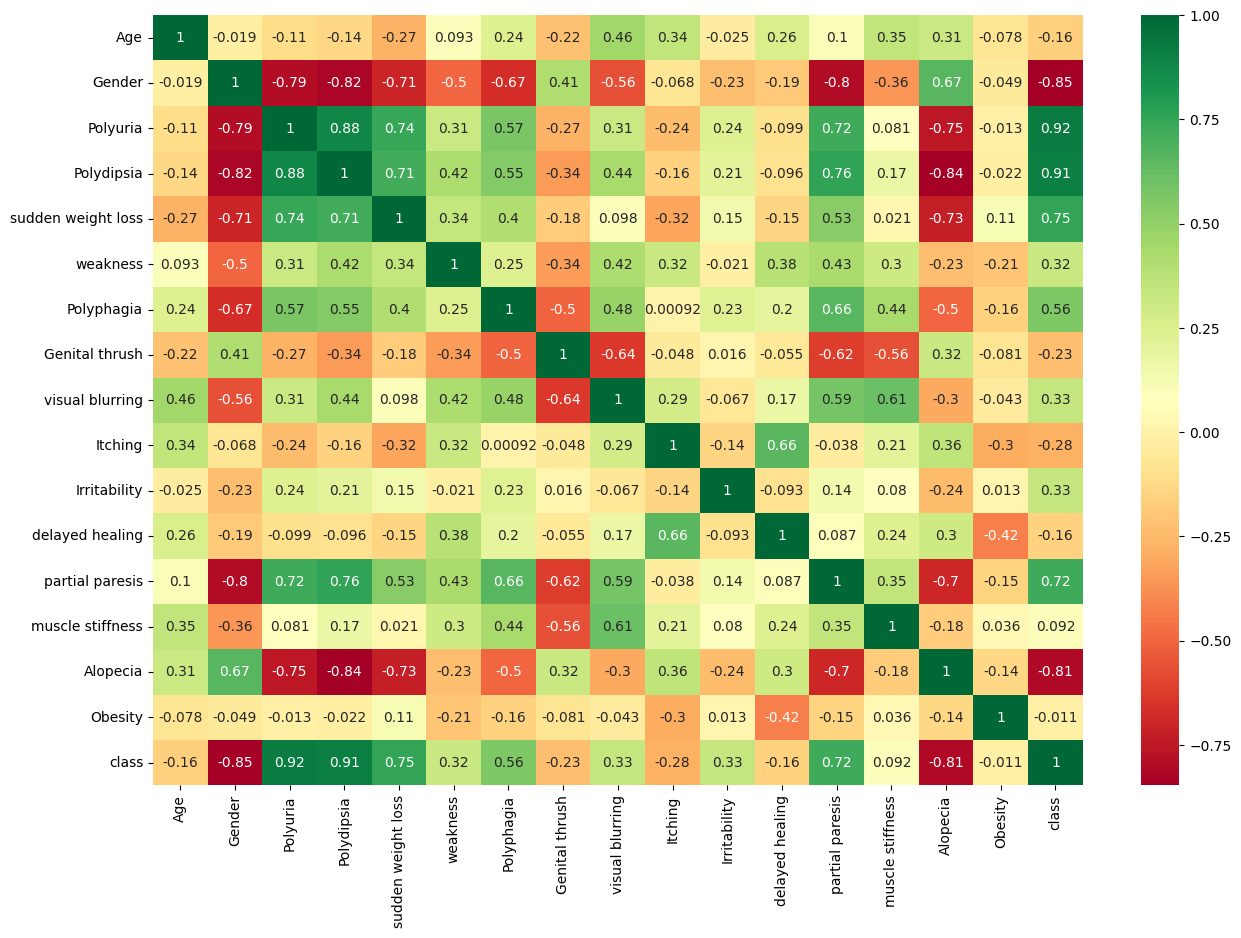

In [ ]:
# Plotting Correlation Matrix
plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Variable Separations

In [ ]:
# Separate features and target variable
X = diabetes_data.drop('class', axis=1)
y = diabetes_data['class']

## Feature Selection based on Chi-Squared scores

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#Selecting 10 best features on the basis of chi-squared scores
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores_chi2 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_chi2.columns = ['Feature','Score']
print(featureScores_chi2.nlargest(10,'Score'))

               Feature       Score
6           Polydipsia  120.785515
1             Polyuria  116.184593
3   sudden weight loss   57.749309
2      partial paresis   55.314286
7               Gender   38.747637
4         Irritability   35.334127
10          Polyphagia   33.198418
8             Alopecia   24.402793
0                  Age   18.845767
5      visual blurring   18.124571


## Creating a barchart of Feature against Importance for Chi-Squared

,Score,Importance (%)
Feature,,
Polydipsia,120.785515,22.729
Polyuria,116.184593,21.863
sudden weight loss,57.749309,10.867
partial paresis,55.314286,10.409
Gender,38.747637,7.291
Irritability,35.334127,6.649
Polyphagia,33.198418,6.247
Alopecia,24.402793,4.592
Age,18.845767,3.546


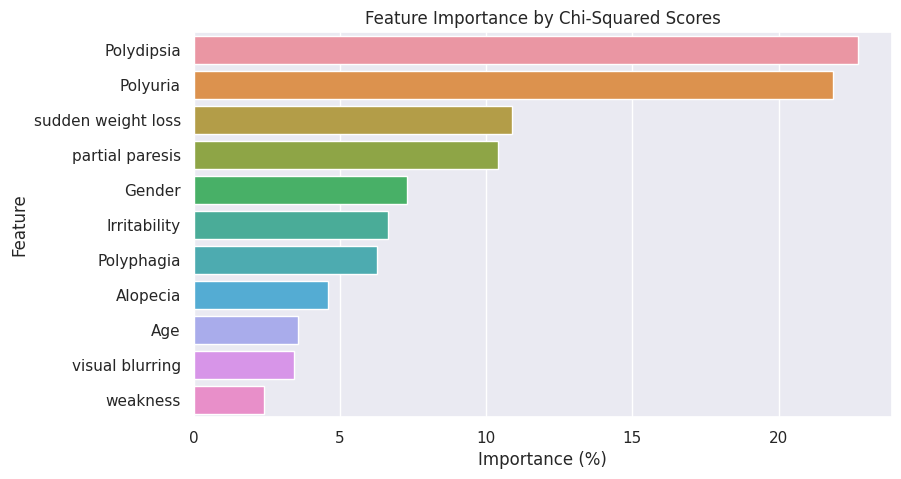

In [ ]:
per = []
for i in fit.scores_:
    per.append(round(((i/sum(fit.scores_))*100), 3))

features_data = pd.DataFrame({'Feature': featureScores_chi2['Feature'], 'Score': featureScores_chi2['Score'], 'Importance (%)': per}).sort_values(by=['Score'], ascending=False)

# Sort the DataFrame by 'Importance (%)' in ascending order
features_data = features_data.sort_values(by=['Importance (%)'], ascending=False)

plt.figure(figsize=(9, 5))
plt.title("Feature Importance by Chi-Squared Scores")
sns.barplot(x='Importance (%)', y='Feature', orient='h', data=features_data)
insignificant = features_data.loc[features_data['Importance (%)'] < 0.005]['Feature'].unique()
features_data.set_index('Feature')

## Feature Selection based on ANOVA F-scores

In [ ]:
#Selecting 10 best features on the basis of f_classif scores
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores_f = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_f.columns = ['Feature','Score']
print(featureScores_f.nlargest(10,'Score'))

               Feature       Score
1             Polyuria  412.738410
6           Polydipsia  376.422649
7               Gender  130.968787
3   sudden weight loss  121.973731
2      partial paresis  119.046534
10          Polyphagia   68.841759
4         Irritability   51.030999
8             Alopecia   39.926590
5      visual blurring   34.917760
9             weakness   32.585064


## Creating a barchart of Feature against Importance for ANOVA F-Score

,Score,Importance (%)
Feature,,
Polyuria,412.738410,29.595
Polydipsia,376.422649,26.991
Gender,130.968787,9.391
sudden weight loss,121.973731,8.746
partial paresis,119.046534,8.536
Polyphagia,68.841759,4.936
Irritability,51.030999,3.659
Alopecia,39.926590,2.863
visual blurring,34.917760,2.504


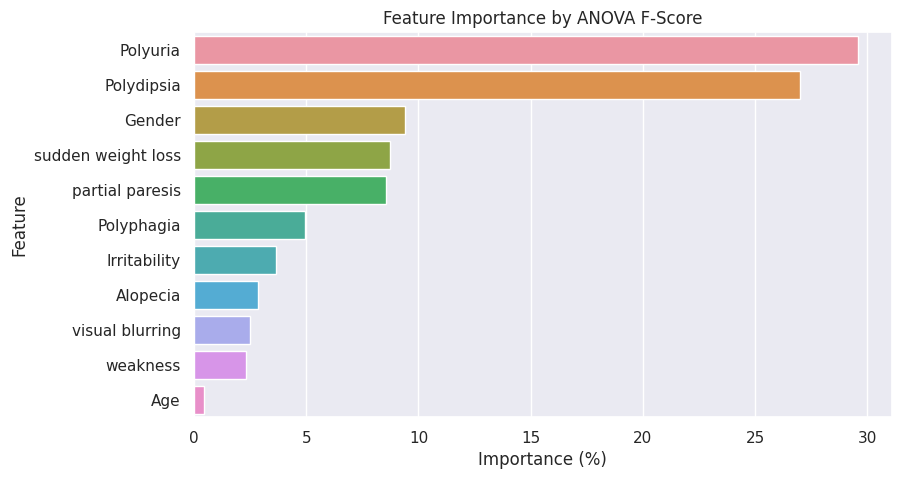

In [ ]:
per = []
for i in fit.scores_:
    per.append(round(((i/sum(fit.scores_))*100), 3))

features_data = pd.DataFrame({'Feature': featureScores_f['Feature'], 'Score': featureScores_f['Score'], 'Importance (%)': per}).sort_values(by=['Score'], ascending=False)

# Sort the DataFrame by 'Importance (%)' in ascending order
features_data = features_data.sort_values(by=['Importance (%)'], ascending=False)

plt.figure(figsize=(9, 5))
plt.title("Feature Importance by ANOVA F-Score")
sns.barplot(x='Importance (%)', y='Feature', orient='h', data=features_data)
insignificant = features_data.loc[features_data['Importance (%)'] < 0.005]['Feature'].unique()
features_data.set_index('Feature')

## Finalize selected features

In [ ]:
f_features=list(featureScores_f.nlargest(10,'Score')['Feature'])
chi2_features=list(featureScores_chi2.nlargest(10,'Score')['Feature'])
selected_features = list(set().union(f_features, chi2_features))
print("Selected Features: ", selected_features)

Selected Features:  ['Age', 'Polyuria', 'partial paresis', 'sudden weight loss', 'Irritability', 'visual blurring', 'Polydipsia', 'Gender', 'Alopecia', 'weakness', 'Polyphagia']


## Use only relevant features that are selected

In [ ]:
# Using only selected features for X
X=diabetes_data[selected_features]

## Split data into train and test in an 80-20 split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Machine Learning Models

## Testing Several Models


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import sklearn.metrics as metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

### Initializing Models

In [ ]:
models = [
    ("Random Forest Classifier", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=42)),
    ("Quadratic Discriminant Analysis (QDA)", QuadraticDiscriminantAnalysis())
]

### Fitting models to test data and calculating metrics

In [ ]:
# Iterate through classifiers and train, test, and display metrics
y_pred_list = []
data = {}

for model_name, model in models:
    # predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # append to lists
    data[model_name] = [accuracy, precision, recall, f1]
    y_pred_list.append(y_pred)

    # print
    print(f"Classifier: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

Classifier: Random Forest Classifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


Classifier: Gradient Boosting Classifier
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Classifier: Quadratic Discriminant Analysis (QDA)
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95




LaTeX table for the data given above:

```
\begin{tabular}{|l|r|r|r|}
\hline
           &   Random Forest Classifier &   Gradient Boosting Classifier &   Quadratic Discriminant Analysis (QDA) \\
\hline
 Accuracy  &                       0.99 &                           0.98 &                                    0.95 \\
 Precision &                       0.99 &                           0.98 &                                    0.95 \\
 Recall    &                       0.99 &                           0.98 &                                    0.95 \\
 F1 Score  &                       0.99 &                           0.98 &                                    0.95 \\
\hline
\end{tabular}
```



### Visualizing the confusion matrix for each model

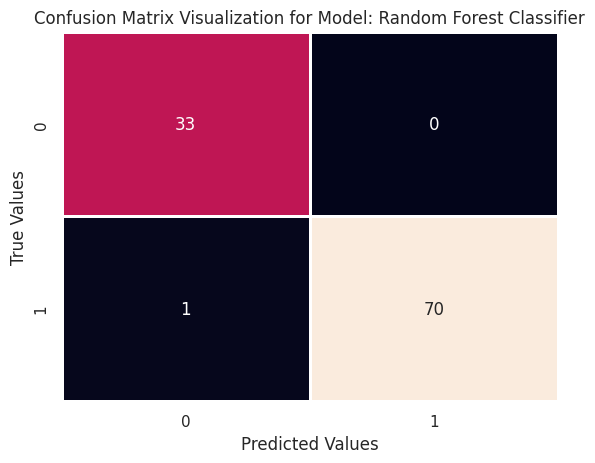

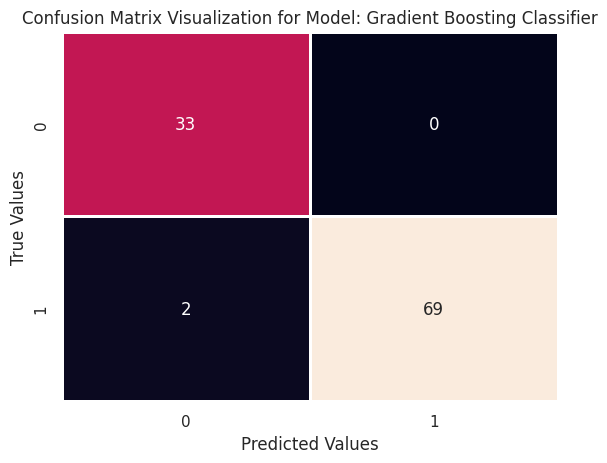

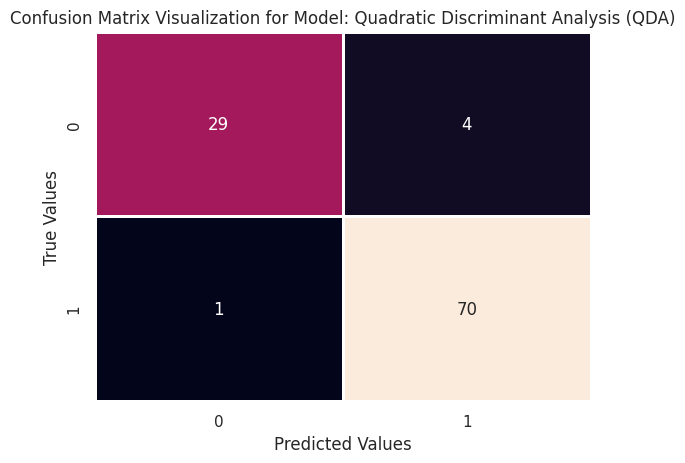

In [ ]:
for i in range(3):
    conf = confusion_matrix(y_test,y_pred_list[i])
    sns.heatmap(confusion_matrix(y_test, y_pred_list[i]),annot=True,lw =2,cbar=False)
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")
    plt.title("Confusion Matrix Visualization for Model: "+models[i][0])
    plt.show()

### Saving a visualization of a single decision tree of random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

# Create and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Visualize a single decision tree from the Random Forest
dot_data = tree.export_graphviz(rf_model.estimators_[0], out_file=None,
                                feature_names=X_train.columns, class_names=["0","1"],
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", format='pdf', cleanup=True)

# Display the graph (optional)
graph.view("random_forest_tree")

'random_forest_tree.pdf'

### Visualizing and saving a single decision tree from the Gradient Boosting model

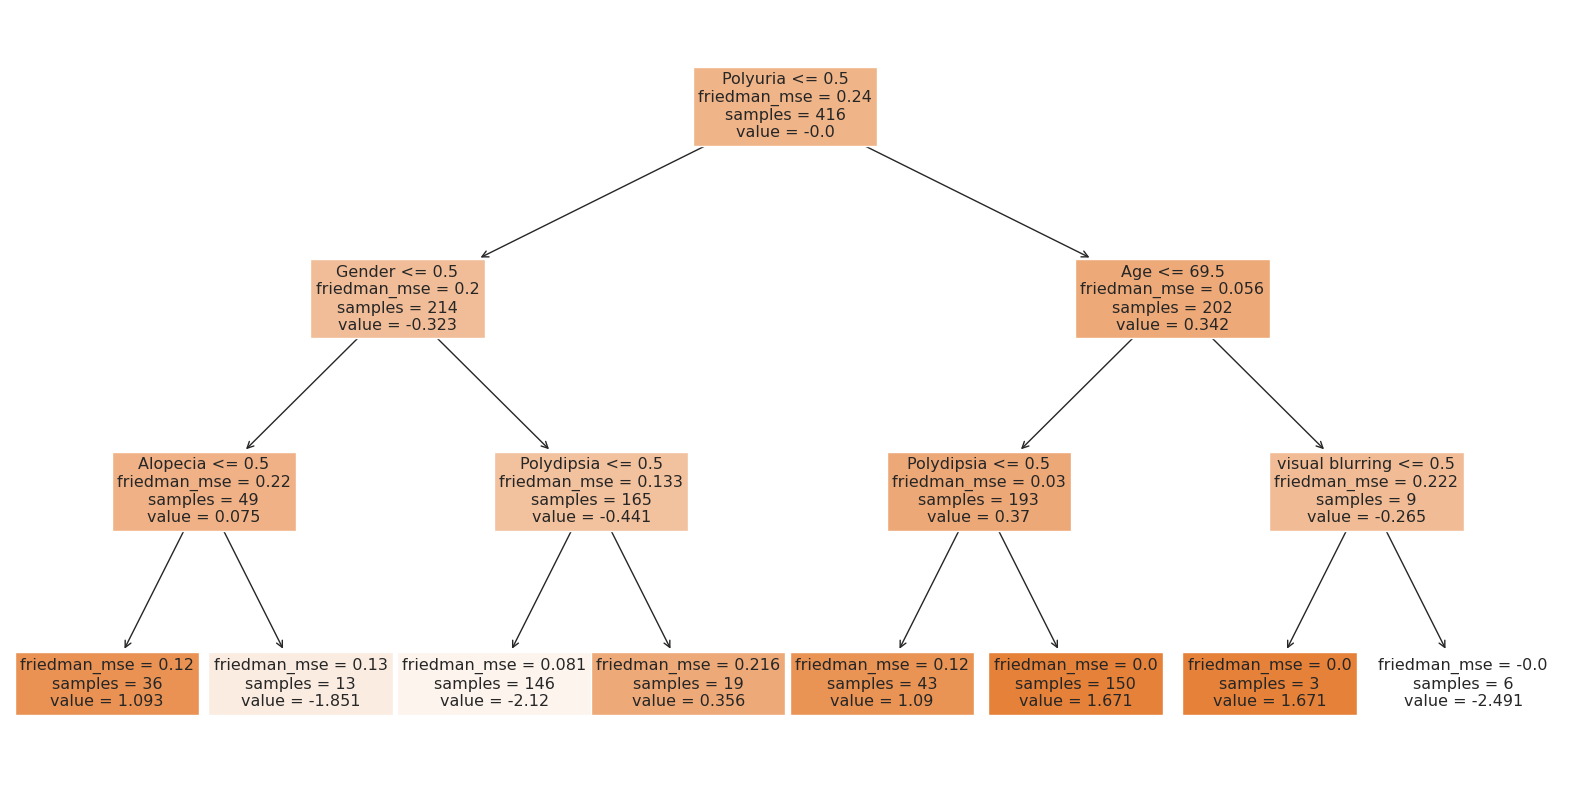

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)

# Visualize a single decision tree from the Gradient Boosting
plt.figure(figsize=(20, 10))
tree.plot_tree(gb_model.estimators_[0, 0], feature_names=X_train.columns, class_names=str(y_train.unique()), filled=True)

# Save the figure before displaying it
plt.savefig('gradient_boosting_tree.png', dpi=300)
plt.show()
